# Метод градиентного спуска

Рассматривает задача поиска минимума функции $$f(x): \mathbb{R}^{n} \to \mathbb{R},$$ 
записываемая в виде: $$f(x): \to \min_{x \in \mathbb{R}^n}.$$
Пусть функция $f(x)$ такова, что можно вычислить ее градиент. Тогда можно применить метод градиентного спуска.
Основная идея метода заключается в том, чтобы осуществлять оптимизацию в направлении наискорейшего спуска, а это направление задачется антиградиентом $- grad f(x_{k}) = -\nabla f(x_{k})$
$$x_{k+1} = x_{k} - \lambda \cdot \nabla f(x_{k})$$
где $\lambda$ выбирается 

### Постановка задачи
Рассматривает задача поиска минимума функции $$f(x): \mathbb{R}^{n} \to \mathbb{R},$$ 
записываемая в виде: $$f(x): \to \min_{x \in \mathbb{R}^n}.$$
Пусть функция $f(x)$ такова, что можно вычислить ее градиент. Тогда можно применить метод градиентного спуска.
Основная идея метода заключается в том, чтобы осуществлять оптимизацию в направлении наискорейшего спуска, а это направление задачется антиградиентом $- grad f(x_{k}) = -\nabla f(x_{k})$
$$x_{k+1} = x_{k} - \lambda \cdot \nabla f(x_{k})$$

где $\lambda$ выбирается:
* постоянной, в этом случае метод может расходиться;
* дробным шагом, т.е. длина шага в процессе спуска делится на некое число;
* неискорейшего спуска $$\lambda = \arg \min_{\lambda} f(x_{k} - \lambda \cdot \nabla f(x_{k}))$$

### Алгоритм
***Вход***: функция $f: \mathbb{R}^{n} \to \mathbb{R}$

***Выход***: найденная точка оптимума $x$
1. Повторять:
2. $x_{k+1} = x_{k} - \lambda_k \cdot \nabla f(x_{k})$, где $\lambda_k$ на каждом $k$-ом шаге выбирается одним из описанных выше способов
3. Если выполнен критерий останова, то возвращаем текущее значение $x_{k+1}$

### Критерий останова

Критерий остановки процесса прибиженногонахождения минимума могут быть основаны на различных соображениях. Так, например, некоторые из них:

* $||x_{k+1} - x_{k}|| \leq \epsilon_x$
* $||f(x_{k+1}) - f(x_{k})|| \leq \epsilon_f$
* $|\nabla f(x_{k})| \leq \epsilon_{\nabla}$ 

Здесь $x_{k} \in \mathbb{R}^n$ - значение, полученное после $k$-го шага оптимизации, $\epsilon$ - наперед заданное положительное число

## Выбор оптимального шага

### Постоянный шаг

Константа $q$, фигурирующая в теореме 2 и характеризующая скорость сходимости метода, зависит от шага $\lambda$. Нетрудно видеть, что величина $q = q(\lambda) = \max\{|1 - \lambda \Lambda|,|1 - \lambda L|\}$ минимальна, если шаг $\lambda$ выбирается из условия $|1 - \lambda \Lambda|=|1 - \lambda L|$, т.е. если $\lambda = \lambda^{*} = 2/(\Lambda - L)$. При таком выборе шага оценка сходимости будет наилучшей и будет характеризоваться величиной: $$q = q^{*} =  \frac{L - \Lambda}{L + \Lambda}$$ 

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
from scipy.misc import derivative
from mpl_toolkits import mplot3d

Зададим функцию, которую необходимо исследовать

In [151]:
def f(x):
    return np.sin(x)*x**2 - 2*x - 2*x**2

Её первая производная определяется, как

In [152]:
def df(x):
    return derivative(f,x)

x = 22.74, f(x) = -1431.523


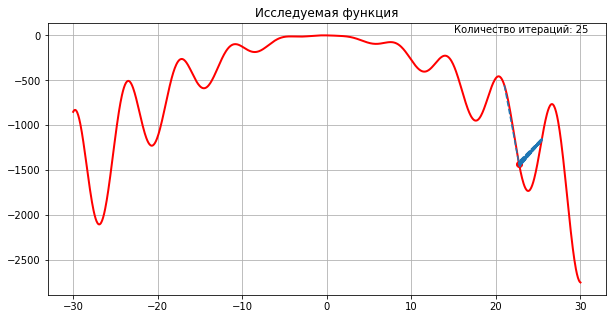

In [160]:
# x_k = np.random.uniform(20, 26)
x_k = 21
eps = 1e-2
x_graph = np.linspace(-30, 30, 1000)

list_x = [x_k]
list_trajectory = [f(x_k)]

plt.figure(figsize=(10,5))
plt.plot(x_graph, f(x_graph), 'r', linewidth=2.0)
plt.title('Исследуемая функция')
plt.grid(True)
plt.scatter(x_k, f(x_k), c='r')
plt.show()

step = 0.1/min(i + 5, 100)
# step = 0.05
  
for i in range(25):
    x_knew = x_k - step*df(x_k)
    if np.abs(f(x_knew) - f(x_k)) < eps:
        break
        
    x_k = x_knew
       
    clear_output(wait=True)
    print(f'x = {np.round(x_knew,3)}, f(x) = {np.round(f(x_knew),3)}')
    plt.figure(figsize=(10,5))
    plt.plot(x_graph, f(x_graph), 'r', linewidth=2.0)
    plt.title('Исследуемая функция')
    plt.grid(True)
    plt.scatter(x_k, f(x_k), c='r')
    plt.text(15, 30, f'Количество итераций: {i+1}')

    list_x.append(x_k)
    list_trajectory.append(f(x_k))
    plt.plot(list_x, list_trajectory, '--')
    plt.show()
    time.sleep(0.5)

In [235]:
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# def df(x):
#     return derivative(f, x)

def df(x):
    return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7),
                     2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)])
# 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
# 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)

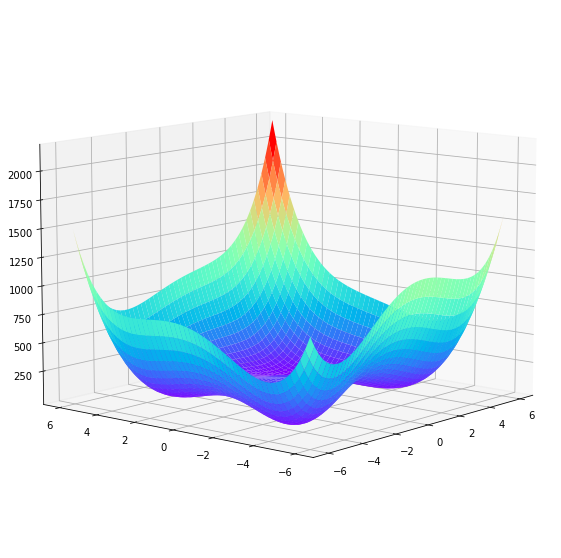

In [236]:
N = 1000
x = np.linspace(-6, 6, N)
y = np.linspace(-6, 6, N)
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, f([X, Y]), cmap='rainbow')
ax.view_init(10, -140)

x = [2.987 2.03 ], f(x) = 0.014


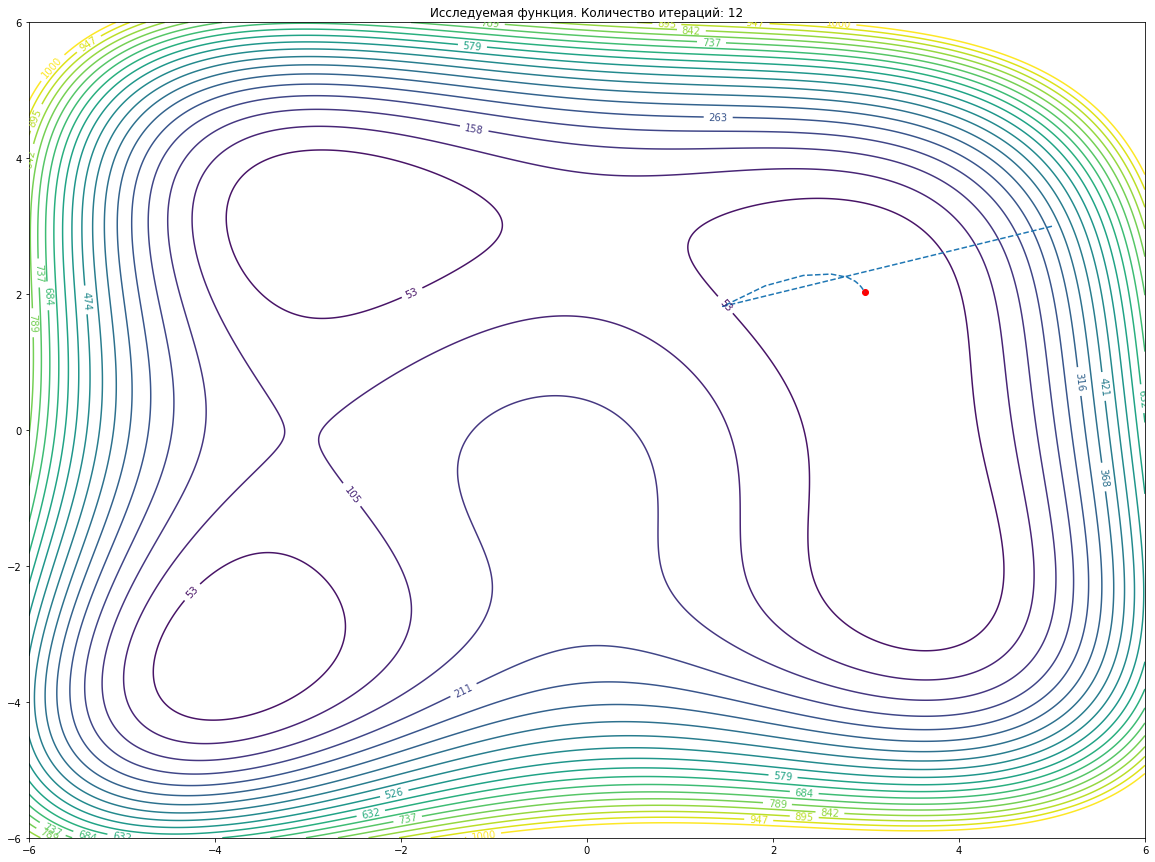

In [238]:
x_k = np.array([5, 3])
list_x = x_k

fig, ax = plt.subplots(figsize=(20,15))
cs = ax.contour(X, Y, f([X, Y]), np.linspace(0, 1000, 25))
cs.changed()
ax.clabel(cs)
plt.scatter(x_k[0], x_k[1], c = 'r')
plt.xlim([-6, 6])
plt.ylim([-6, 6])

step = 0.01
step = 0.1/min(i + 5, 100)

for i in range(30):
    x_knew = x_k - step*df(x_k)
    if np.abs(f(x_knew) - f(x_k)) < eps:
        break
        
    x_k = x_knew
        
    clear_output(wait=True)
    print(f'x = {np.round(x_knew,3)}, f(x) = {np.round(f(x_knew),3)}')
    fig, ax = plt.subplots(figsize=(20,15))
    cs = ax.contour(X, Y, f([X, Y]), np.linspace(0, 1000, 20))
    cs.changed()
    ax.clabel(cs)
    list_x = np.vstack([list_x, x_k])
    ax.plot(list_x[:,0], list_x[:,1], '--')
    plt.scatter(x_k[0], x_k[1], c = 'r')
    plt.xlim([-6, 6])
    plt.ylim([-6, 6])
    plt.title(f'Исследуемая функция. Количество итераций: {i+1}')

    plt.show()
    time.sleep(1)


In [3]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters
m = 100
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) #random initilization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta)

[[3.83320973]
 [3.16407048]]
